In [70]:
from scipy.io import netcdf
import scipy.io
import scipy,sys,os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.lines as mlines

from matplotlib.colors import LinearSegmentedColormap

import netCDF4
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import interp2d
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rc('font',family='Helvetica')
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=sys.maxsize)


## 1. Read in Vs Model

In [77]:
nc_file = netCDF4.Dataset('YangETAL_GreatSitkinFWANT_Vs2023.nc','r+')
depth = nc_file.variables['depth'][:]
lon = nc_file.variables['longitude'][:]
lat = nc_file.variables['latitude'][:]
vs = nc_file.variables['vs'][:]
# vp = nc_file.variables['vp'][:]
nc_file.close()
figlabels = ['a','b','c','d','e','f','g','h','i','j','k','l']


## 2. Plot your area of Study to verify Basemap is working

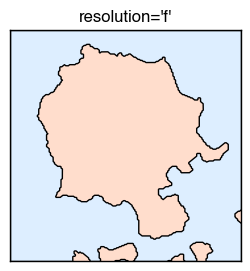

In [72]:
fig, ax = plt.subplots(figsize=(6, 3))

m = Basemap(projection='gnom', lat_0=52.04, lon_0=-176.102625,
            width=20000, height=20000, resolution='f', ax=ax)
m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
m.drawmapboundary(fill_color="#DDEEFF")
m.drawcoastlines()
ax.set_title("resolution='{0}'".format('f'));

## 3. Plot your dvv over your Vs Model

In [78]:
##### 4x3 grid
#quick access to options           
comp = "xc" #lower case
res = 'f' 
fontsize = 14
contour_cmap = 'jet_r'
pos_color = '#80808000'#'tab:green'
neg_color = '#80808000'#'purple'
pos_marker='o'
neg_marker='s'
pos_alpha = None#.65
neg_alpha = None
linewidth = 2.
###


#### basic params
vs.reshape(87,243,172)
lat_center = np.median(lat)
lon_center = np.median(lon)

llcrnrlon = np.min(lon)-0.03 
llcrnrlat = np.min(lat)-0.03
urcrnrlon = np.max(lon)+0.03
urcrnrlat = np.max(lat)+0.03
##### lists of stations, dvv dates/results, depths
sta_list = ['AV.GSCK','AV.GSMY','AV.GSSP','AV.GSTR','AV.GSTR']
sta_y = np.array([52.0115,52.0430,52.0937,52.055797,52.0944,])
sta_x = np.array([-176.151768,-176.0567,-176.17752,-176.144777,-176.0567])

if comp=='xc':
    #XC DVV CHANGES!!!!

    sta_dvv = np.array([[-0.0163, 0.1553, -0.2384, 0.1742, 0.0555],\
                        [0.1828, 0.674, 1.3663, 0.4132, 0.4287],\
                        [0.2532, 0.6577, 2.6939, 1.2604, 0.9089]])
    # ##SC DVV CHANGES!!!!
if comp=='sc':
    sta_dvv = np.array([[0.0324, -0.003, -0.1875, -0.0566, 0.0445],\
                        [0.0908, 0.2748, 0.819, -0.101, 0.2238],\
                        [0.0837, 0.2606, 1.2919, 0.018, 0.4339]])
    
dvv_dates = ['5/26/2021',\
         '9/28/2021',\
         '3/3/2022']

depths_idx = [29,40,53]

#### everything below in for loop
for d_idx in depths_idx:
    deep = str(round(depth[d_idx],2))
    #This step rids any values outside the mask
    for i in range(len(lat)):
        for j in range(len(lon)):
            val = vs[d_idx][i][j]
            if val > 10:
                vs[d_idx][i][j] = np.nan
                
#color_seis = LinearSegmentedColormap.from_list('name', ['yellow', 'purple'])(np.linspace(0,1,60))
color_seis = pl.cm.viridis(np.linspace(0,1,60))


/usr/local/anaconda3/envs/seisgo/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


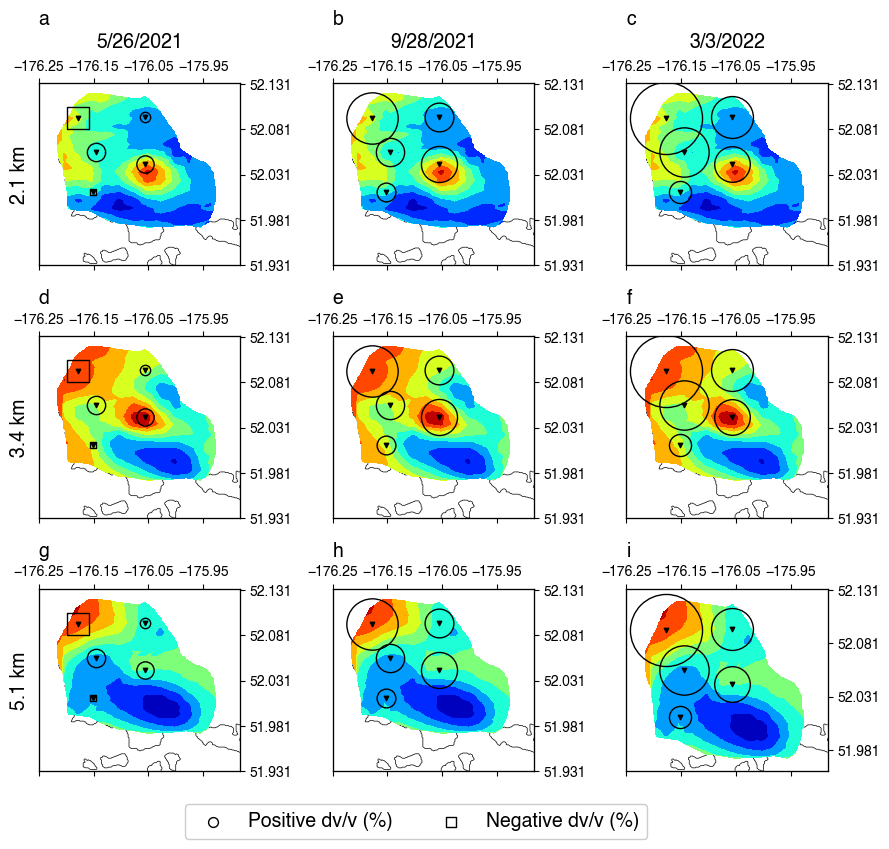

In [79]:
fig, ax = plt.subplots(3,3,figsize=(9,8))
for k in range(ax.shape[1]):
    for j in range(ax.shape[0]):        
        m = Basemap(projection='tmerc', lat_0 = lat_center, lon_0 = lon_center,\
                llcrnrlon = llcrnrlon, llcrnrlat = llcrnrlat, \
                urcrnrlon = urcrnrlon, urcrnrlat = urcrnrlat, resolution=res, ax=ax[j,k])
        # m.fillcontinents(color="gray",alpha=0.2)
        # m.drawmapboundary(fill_color="k")
        m.drawcoastlines(linewidth=0.5,color='k',zorder=20)

        #plot vs and dvv
        deep = str(round(depth[depths_idx[j]],2))
        ax2 = ax[j,k].twinx().twiny()
        ax2.set_xlim(llcrnrlon,urcrnrlon)
        
    # # # #contour labels
        CS = ax2.contourf(lon,lat,vs[depths_idx[j]], cmap = contour_cmap,zorder=0)
        # ax2.clabel(CS, CS.levels, inline=True, fontsize=fontsize*.75)
        for i, sta in enumerate(sta_list):
            if sta_dvv[k][i] >= 0:
                col = pos_color
                alpha_val = pos_alpha
                marker=pos_marker
            elif sta_dvv[k][i] < 0:
                col = neg_color
                alpha_val = neg_alpha
                marker=neg_marker
            sc = ax2.scatter(sta_x[i], sta_y[i], s=1000*np.absolute(sta_dvv[k][i]), \
                    alpha = alpha_val,linewidth = 1,\
                    color=col,edgecolor = (0,0,0,1),marker =marker,zorder=30)
        ax2.scatter(sta_x, sta_y, c='black',s=10,marker ='v',zorder=35)
        ax2.set_xticks(ticks=np.arange(llcrnrlon,urcrnrlon,0.1))
        ax2.set_yticks(ticks=np.arange(llcrnrlat,urcrnrlat,0.05))
        ax2.tick_params(left=True, bottom=True,top=True,right=True)
        ax2.set_title(figlabels[j*ax.shape[0]+k], fontsize=14,loc='left')
        if j==0:
            ax[j,k].set_xlabel(dvv_dates[k], labelpad = fontsize*1.8, fontsize = fontsize)
            ax[j,k].xaxis.set_label_position('top') 
        if k==0:
            ax[j,k].set_ylabel(str(round(depth[depths_idx[j]],1))+' km',labelpad = fontsize*.5,\
                        fontsize = fontsize)
            ax[j,k].yaxis.set_label_position('left')
        # if k==ax.shape[1]-1:
        #     plt.colorbar(CS,ax=ax[j,k],label='Vs (km/s)')
 
neg_circle = plt.scatter([], [], color=neg_color, marker=neg_marker, edgecolor='k',
                          s=50, label='Negative dv/v (%)')
pos_circle = plt.scatter([], [], color=neg_color, marker=pos_marker, edgecolor='k',
                          s=50, label='Positive dv/v (%)')

fig.legend(handles=[pos_circle, neg_circle],fontsize = fontsize,\
           framealpha=1, ncol = 4, bbox_to_anchor=(.735, -0.0))
plt.tight_layout()
plt.savefig('Figures/dvv_vs_model_'+comp+'.pdf',bbox_inches='tight', format = 'pdf', dpi=300 )
plt.show()

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


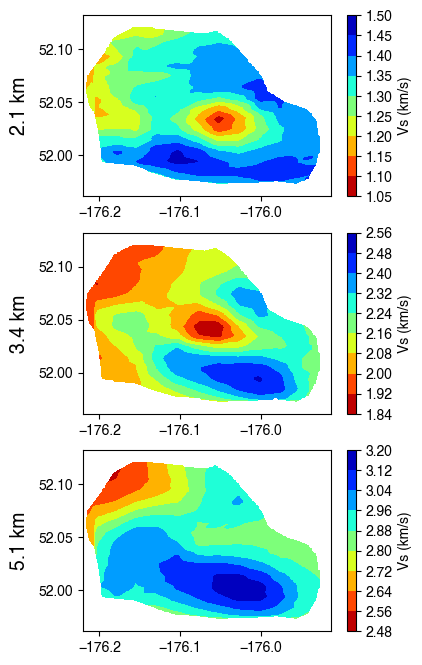

In [75]:
fig, ax = plt.subplots(3,1,figsize=(4,8))
for j in range(ax.shape[0]):        
# # # #contour labels
    CS = ax[j].contourf(lon,lat,vs[depths_idx[j]], cmap = contour_cmap,zorder=0)
    
    plt.colorbar(CS,ax=ax[j],label='Vs (km/s)')

for j, km in enumerate(depths_idx):
    #ax[j,0].set_title("Depth for Vs Model {} km".format(deep));
    ax[j].set_ylabel(str(round(depth[km],1))+' km',labelpad = fontsize*.5,\
                       fontsize = fontsize)
    ax[j].yaxis.set_label_position('left')

plt.savefig('Figures/dvv_vs_model_cbar.pdf',bbox_inches='tight', format = 'pdf', dpi=300 )
plt.show()